PABLO CUESTA SIERRA - 2020/03/08

# ** Semana 20 **

## Modelos aleatorios ##

## Urnas de Polya ## 

Vamos a trabajar con modelos de las llamadas **Urnas de Polya**, en las que la probabilidad de sacar bolas blancas o negras varía en función de las extracciones anteriores. Usaremos dos modelos.

**Urna de Polya fuerte**: *si sacamos una bola de un color, la devolvemos a la urna junto a otras (en número fijo)* **del mismo color**.

**Urna de Polya débil**: *si sacamos una bola de un color, la devolvemos a la urna junto a otras (en número fijo)* **del otro color**.

Lo habitual es empezar con $1$  bola blanca y $1$  bola negra y que tras cada extracción se meta en la urna $1$  bola adicional (del color que toque), pero nosotros, para experimentar mejor, vamos a escribir programas con estos datos como parámetros.

**URNA FUERTE**

a) Escribe un programa que, dados el número inicial de bolas blancas y negras, la cantidad de bolas añadidas tras cada extracción, y el número de extracciones sucesivas que hacemos, nos devuelva un gráfico con la proporción de bolas blancas **tras cada extracción**.

¿Qué esperarás que pase? ¿Quizás que, tras unos momentos iniciales de oscilación, las bolas tiendan a concentrarse en un solo color?

Repite varias veces el experimento empezando con $1$  bola blanca y $1$  negra, añadiendo $1$  bola cada vez y realizando $1000$  extracciones y mira a ver si se confirma tu intuición.

> Creo que a la larga, las bolas se concenterarán en un solo color.

In [13]:
def UPFuerte(bla, neg, nuevas, nextrac):
    propblancas=[(0,bla/(neg+bla))]
    for j in [1..nextrac]:
        if random()<(bla/(bla+neg)): #se saca blanca
            bla+=1
        else:                        #se saca negra
            neg+=1
        propblancas+=[(j,bla/(neg+bla))]
    return line(propblancas)

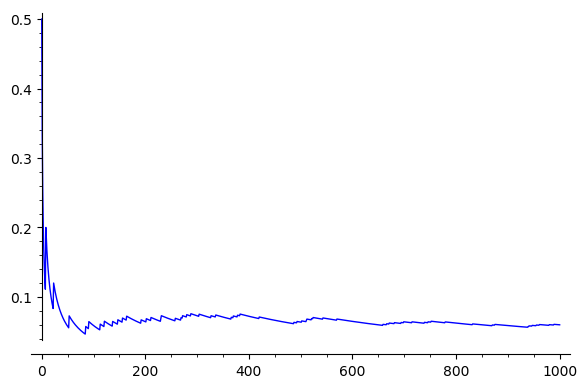

In [14]:
UPFuerte(1,1,1,1000)

b) Para ver cuáles son los resultados posibles, dibuja un histograma que recoja el número final de blancas en $1000$ repeticiones del experimento anterior. ¿Qué distribución obtienes?

**NOTA**: te puede interesar modificar ligeramente el programa anterior para que, en lugar del gráfico, te dé el número de bolas blancas.

In [15]:
def UPFuerteBlancasFinal(bla, neg, nuevas, nextrac):
    for j in [1..nextrac]:
        if random()<(bla/(bla+neg)): #se saca blanca
            bla+=1
        else:                        #se saca negra
            neg+=1
    return bla

In [19]:
valores=[UPFuerteBlancasFinal(1,1,1,1000) for _ in xrange(1000)]
valores[:10]

[896, 364, 34, 74, 781, 537, 139, 539, 599, 252]

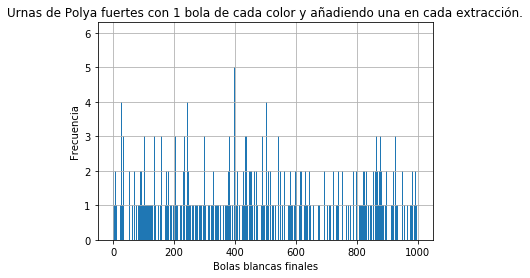

In [20]:

import matplotlib.pyplot as plt #DESCOMENTAR SI AÚN NO SE HA CARGADO ESTA LIBRERÍA

plt.title(u"Urnas de Polya fuertes con 1 bola de cada color y añadiendo una en cada extracción.") # Título del histograma
plt.xlabel("Bolas blancas finales") # Etiqueta para el eje x
plt.ylabel("Frecuencia") # Etiqueta para el eje y
plt.grid(True)
marcas=[j-.5 for j in xrange(0,1000)] # Clases
plt.hist(valores,bins=marcas) # Histograma
titulo='urnasPfuertes.png' # Título de la figura
#plt.savefig(titulo) # Descomentamos si queremos salvar la figura
plt.show(titulo)
plt.close() #Puesto que no la vamos a usar más, cerramos la librería

**URNA DÉBIL**

c) Repite el apartado a) para la Urna de Polya débil.

d) Repite el apartado b) para la Urna de Polya débil.

¿Qué observas ahora?

In [21]:
def UPDebil(bla, neg, nuevas, nextrac):
    propblancas=[(0,bla/(neg+bla))]
    for j in [1..nextrac]:
        if random()<(bla/(bla+neg)): #se saca blanca
            neg+=1
        else:                        #se saca negra
            bla+=1
        propblancas+=[(j,bla/(neg+bla))]
    return line(propblancas)

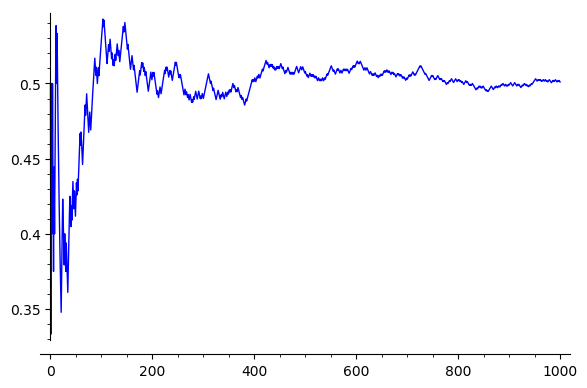

In [22]:
UPDebil(1,1,1,1000)

In [23]:
def UPDebilBlancasFinal(bla, neg, nuevas, nextrac):
    for j in [1..nextrac]:
        if random()<(bla/(bla+neg)): #se saca blanca
            neg+=1
        else:                        #se saca negra
            bla+=1
    return bla

In [24]:
valores=[UPDebilBlancasFinal(1,1,1,1000) for _ in xrange(1000)]
valores[:10]

[504, 506, 489, 496, 495, 493, 500, 498, 522, 492]

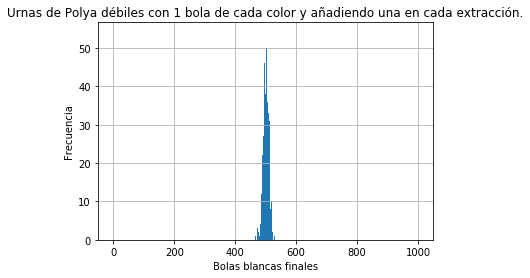

In [25]:

import matplotlib.pyplot as plt #DESCOMENTAR SI AÚN NO SE HA CARGADO ESTA LIBRERÍA

plt.title(u"Urnas de Polya débiles con 1 bola de cada color y añadiendo una en cada extracción.") # Título del histograma
plt.xlabel("Bolas blancas finales") # Etiqueta para el eje x
plt.ylabel("Frecuencia") # Etiqueta para el eje y
plt.grid(True)
marcas=[j-.5 for j in xrange(0,1000)] # Clases
plt.hist(valores,bins=marcas) # Histograma
titulo='urnasPdébiles.png' # Título de la figura
#plt.savefig(titulo) # Descomentamos si queremos salvar la figura
plt.show(titulo)
plt.close() #Puesto que no la vamos a usar más, cerramos la librería

> En este caso se concentra en el valor medio, es decir, se tiende a que la proporción sea de $1/2$.

e) Considera otros juegos de valores, por ejemplo blancas=2, negras=1, remplazo=1; o blancas=1, negras=1, remplazo=5; o blancas=2, negras=1, remplazo=5, y dibuja los correspondientes histogramas para las urnas fuerte y débil. ¿Qué observas?

**SUGERENCIA**: Para no tener que teclear (o copiar) el código cada vez, puedes escribir una función que devuelva el histograma para la urna fuerte y otra que devuelva el histograma para la urna débil.

In [41]:
def histogramaUrnasPolya(fuerte,bla,neg,nuevas,nextrac):
    title=u'Histograma Urnas Polya '
    if fuerte:
        valores=[UPFuerteBlancasFinal(1,1,1,1000) for _ in xrange(1000)]
        title+=u'fuertes '
    else: 
        valores=[UPDebilBlancasFinal(1,1,1,1000) for _ in xrange(1000)]
        title+=u'débiles '
        
    title+=u'con '+str(bla)+u' bolas blancas y '+str(neg)+ u' negras añadiendo '+str(nuevas)+u' con cada extracción ('+str(nextrac)+u' extracciones).'
    
    import matplotlib.pyplot as plt #CARGAR LIBRERÍA

    plt.title(title) # Título del histograma
    plt.xlabel("Bolas blancas finales") # Etiqueta para el eje x
    plt.ylabel("Frecuencia") # Etiqueta para el eje y
    plt.grid(True)
    marcas=[j-.5 for j in xrange(0,1000)] # Clases
    plt.hist(valores,bins=marcas) # Histograma
    titulo='urnasP.png' # Título de la figura
    #plt.savefig(titulo) # Descomentamos si queremos salvar la figura
    plt.show(titulo)
    plt.close() #Puesto que no la vamos a usar más, cerramos la librería

<p><span style="font-size: large;"><strong>Primero las urnas fuertes</strong></span></p>

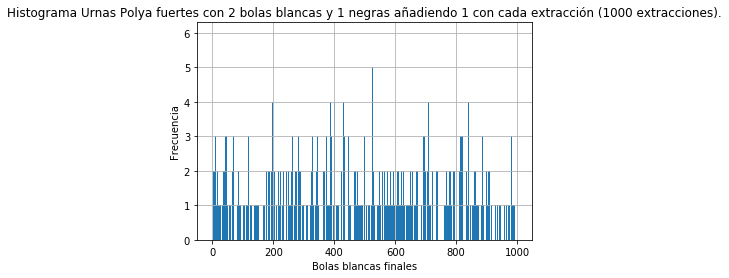

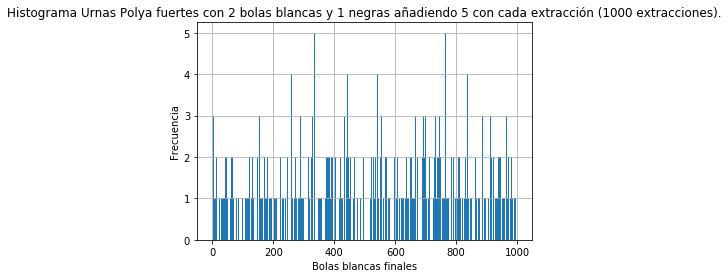

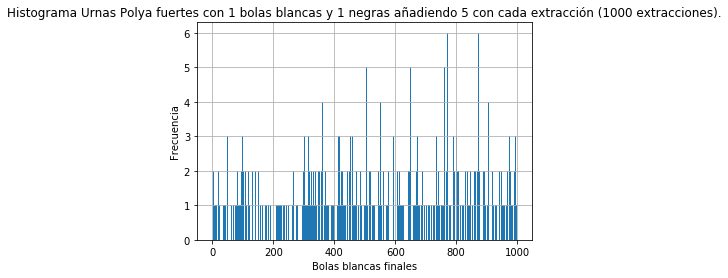

(None, None, None)

In [42]:
histogramaUrnasPolya(true,2,1,1,1000),histogramaUrnasPolya(true,2,1,5,1000),histogramaUrnasPolya(true,1,1,5,1000)

<p><span style="font-size: large;"><strong>Ahora las urnas débiles.</strong></span></p>

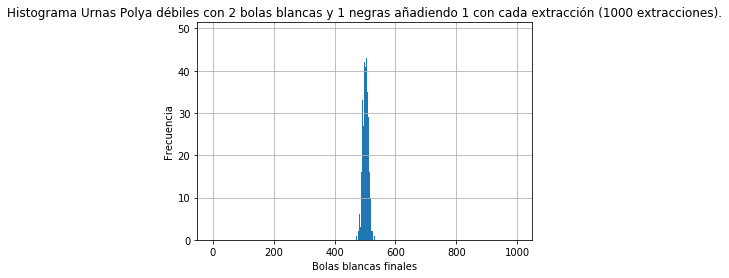

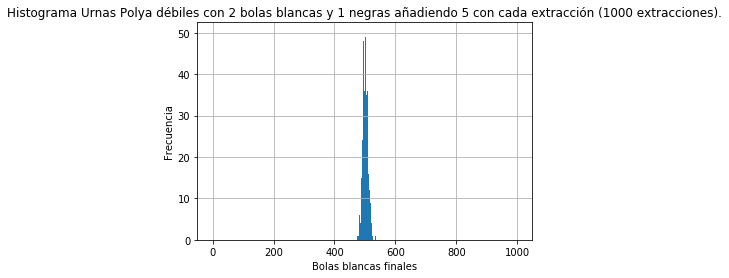

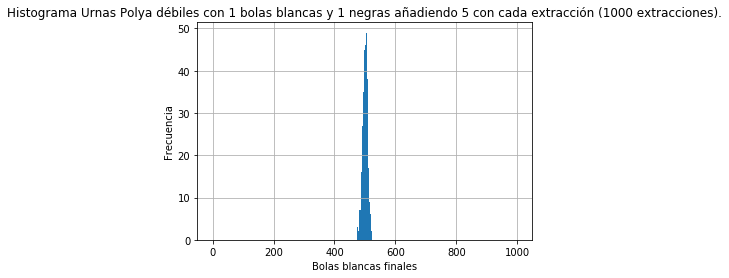

(None, None, None)

In [43]:
histogramaUrnasPolya(false,2,1,1,1000),histogramaUrnasPolya(false,2,1,5,1000),histogramaUrnasPolya(false,1,1,5,1000)

## El juego de la ruleta ##

Vamos a jugar a **la ruleta**, haciendo solo una apuesta sencilla: a rojo. Si sale un número rojo, nos devuelven la apuesta doblada, en otro caso, perdemos lo apostado. En una ruleta "justa", habría 18 números rojos y 18 números negros. En una ruleta (europea) real, hay además un 0. Si sale 0, la casa se queda todas las apuestas (y de ahí sale su beneficio)

Vamos a jugar de dos maneras.

**PRIMERA FORMA DE JUGAR**

Empezamos con un capital inicial y en cada ronda apostamos 1&euro;. Salvo que nos arruinemos antes, jugamos un número máximo de veces y luego nos retiramos.

a) Escribe un programa que, dadas la probabilidad de que salga rojo, el capital inicial, y el número máximo de jugadas, nos devuelva el capital que tenemos al retirarnos (bien por ruina o bien por haber hecho el máximo de jugadas).

b) Observa que jugar así con un capital inicial mayor que el máximo de jugadas es un paseo aleatorio, empezando en una posición igual al capital inicial, pero si jugamos 100 veces empezando con 10&euro;, hay riesgo de arruinarse y la situación cambia. 

Utiliza la función anterior para simular 1000 veces sobre una ruleta justa la situación que acabamos de describir y dibuja un histograma con las ganancias en las 1000 repeticiones. ¿Cuál sería la ganancia media en los 1000 intentos? ¿Cuál el número de veces que nos arruinamos?

c) Repite el apartado b), pero jugando ahora con una ruleta real. ¿Ves alguna diferencia notable?

In [44]:
def ruleta(p,capital,nmax):
    for _ in xrange(nmax):
        if random()<p:
            capital+=1
        else:
            capital-=1
        if capital==0:
            return 0
    return capital

In [120]:
ruleta(.5,70,100),ruleta(.5,10,100)

(42, 0)

In [131]:
simulaciones=[ruleta(.5,10,100) for _ in xrange(1000)]
simulaciones[:10], max(simulaciones), min(simulaciones)

([6, 0, 0, 0, 30, 28, 0, 20, 30, 24], 40, 0)

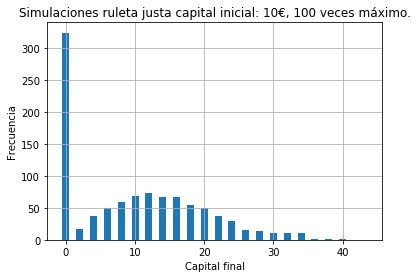

In [132]:
import matplotlib.pyplot as plt #DESCOMENTAR SI AÚN NO SE HA CARGADO ESTA LIBRERÍA

plt.title(u"Simulaciones ruleta justa capital inicial: 10€, 100 veces máximo.") # Título del histograma
plt.xlabel("Capital final") # Etiqueta para el eje x
plt.ylabel("Frecuencia") # Etiqueta para el eje y
plt.grid(True)
marcas=[j-.5 for j in xrange(0,45)] # Clases
plt.hist(simulaciones,bins=marcas) # Histograma
titulo='Histograma.png' # Título de la figura
#plt.savefig(titulo) # Descomentamos si queremos salvar la figura
plt.show(titulo)
plt.close() #Puesto que no la vamos a usar más, cerramos la librería

<p><span style="font-size: large;"><strong>Vamos ahora con la ruleta real.</strong></span></p>

In [127]:
p=18/(1+2*18)
ruleta(p,100,100), ruleta(p,10,100)

(98, 0)

In [133]:
simulaciones=[ruleta(p,10,100) for _ in xrange(1000)]
simulaciones[:10], max(simulaciones), min(simulaciones)

([0, 6, 16, 0, 14, 32, 0, 12, 26, 16], 40, 0)

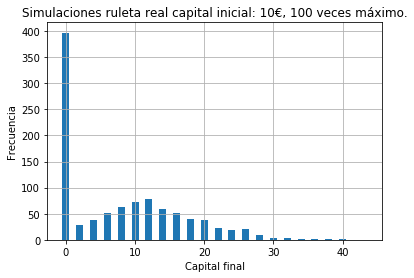

In [134]:
import matplotlib.pyplot as plt #DESCOMENTAR SI AÚN NO SE HA CARGADO ESTA LIBRERÍA

plt.title(u"Simulaciones ruleta real capital inicial: 10€, 100 veces máximo.") # Título del histograma
plt.xlabel("Capital final") # Etiqueta para el eje x
plt.ylabel("Frecuencia") # Etiqueta para el eje y
plt.grid(True)
marcas=[j-.5 for j in xrange(0,45)] # Clases
plt.hist(simulaciones,bins=marcas) # Histograma
titulo='Histograma.png' # Título de la figura
#plt.savefig(titulo) # Descomentamos si queremos salvar la figura
plt.show(titulo)
plt.close() #Puesto que no la vamos a usar más, cerramos la librería

**SEGUNDA FORMA DE JUGAR** 

Empezamos con un capital inicial. En la primera ronda apostamos 1&euro;. Si ganamos, nos retiramos, si perdemos, doblamos la apuesta: 2&euro;. Si perdemos, seguimos doblando la apuesta (4&euro;, 8&euro;, ...) hasta que ganamos una vez, momento en que nos retiramos. Por supuesto, también nos retiramos (forzados) si nos arruinamos, que ahora significa que nos queda menos dinero del que nos tocaría apostar.

**Observa** que, si ganamos en la jugada $n$, el capital invertido será $1+2+2^2+\dots+2^{n-1}=2^n-1$, y lo que nos pagarían sería $2\cdot 2^{n-1}=2^n$. Por tanto, las posibilidades son arruinarnos o ganar 1&euro;.

**Observa** también que si tuviésemos capital infinito no nos arruinaríamos, y "casi seguramente" ganaríamos 1&euro;. La única posibilidad de no ganar sería que nunca saliese rojo, lo que es posible pero (salvo que la probabilidad de negro fuese 1) sucede con probabilidad 0 (más adelante aprenderás que se dice que ganamos 1&euro; "casi seguramente").

Así, lo que nos interesa es considerar un capital inicial $2^n-1$ y ver cuál es la probabilidad de ganar 1&euro; (la opción alternativa es, ahora literalmente, arruinarnos). Por ejemplo, para $n=1$ (tenemos 1&euro; y, o ganamos a la primera o dejamos de jugar), la probabilidad de ganar 1&euro; coincide exactamente con la de que salga rojo.

d) Escribe un programa que, dados la probabilidad de que salga rojo y el capital inicial, simule la segunda manera de jugar y devuelva 1 si gano (1&euro;) y 0 si me arruino.

e) Utiliza lo anterior para escribir un programa que, dadas la probabilidad de que salga rojo, el capital inicial, y un número de repeticiones de esta segunda forma de jugar, calcule la proporción de veces que ganamos. **Este es un ejemplo donde usamos un programa que ya tenemos como *subrutina* en otro programa.**

f) Dibuja, sobre unos mismos ejes y con colores distintos, dos gráficas que representen la proporción de veces que ganamos en 1000 repeticiones para capitales iniciales $2^n-1$ con $n\in\{1,\dots,15\}$, una gráfica jugando con una ruleta "justa" y la otra con una ruleta real. ¿Qué observas? ¿Qué pasa si lo haces con una ruleta con probabilidad de rojo más pequeña?

In [173]:
def ruleta2(p,capital):
    j=0
    while capital > 0:
        apuesta=2**j
        if capital - apuesta < 0:
            return 0
        if random()<p:
            capital+=apuesta
            return 1
        else:
            capital-=apuesta
        j+=1

In [182]:
def proporcion(p,cap,rep):
    fav=sum([Integer(ruleta2(p,cap)) for _ in xrange(rep)])
    return fav/rep*1.

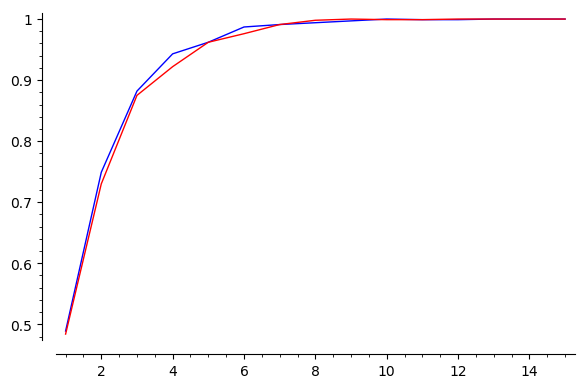

In [187]:
p=18/37
Pjustos=[(j,proporcion(.5,2^j-1,1000)) for j in [1..15]]
Preales=[(j,proporcion(p,2^j-1,1000)) for j in [1..15]]
line(Pjustos,color='blue')+line(Preales, color='red')

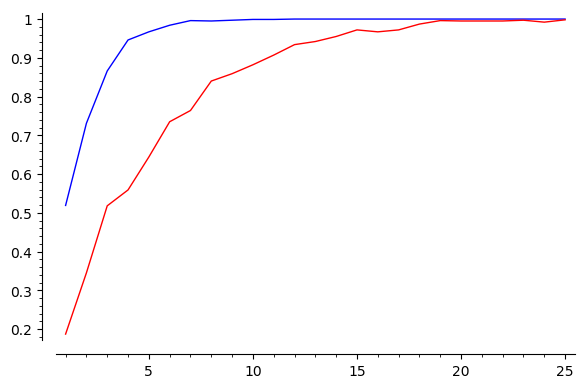

In [190]:
p=.2
Pjustos=[(j,proporcion(.5,2^j-1,1000)) for j in [1..25]]
Preales=[(j,proporcion(p,2^j-1,1000)) for j in [1..25]]
line(Pjustos,color='blue')+line(Preales, color='red')